Preparing the Data and Loading the data

Begin by loading the Citi Bike and NOAA weather datasets into pandas. Use pandas.read_csv() to read each CSV file. If the data comes in multiple CSVs (for example, for different months), you can concatenate them.

Citi Bike Data

In [3]:
import pandas as pd

# Load multiple CSV files using pd.concat
citi_bike_data = pd.concat([pd.read_csv(f'JC-201601-citibike-tripdata.csv') for i in range(1, 13)], ignore_index=True)


Weather Data

In [5]:
weather_data = pd.read_csv('newark_airport_2016.csv')


After loading the data, check the first few rows of both datasets to get a sense of what they look like


In [9]:
citi_bike_data.head()


,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,362,2016-01-01 00:02:52,2016-01-01 00:08:54,3186,Grove St PATH,40.719586,-74.043117,3209,Brunswick St,40.724176,-74.050656,24647,Subscriber,1964.0,2
1,200,2016-01-01 00:18:22,2016-01-01 00:21:42,3186,Grove St PATH,40.719586,-74.043117,3213,Van Vorst Park,40.718489,-74.047727,24605,Subscriber,1962.0,1
2,202,2016-01-01 00:18:25,2016-01-01 00:21:47,3186,Grove St PATH,40.719586,-74.043117,3213,Van Vorst Park,40.718489,-74.047727,24689,Subscriber,1962.0,2
3,248,2016-01-01 00:23:13,2016-01-01 00:27:21,3209,Brunswick St,40.724176,-74.050656,3203,Hamilton Park,40.727596,-74.044247,24693,Subscriber,1984.0,1
4,903,2016-01-01 01:03:20,2016-01-01 01:18:24,3195,Sip Ave,40.730743,-74.063784,3210,Pershing Field,40.742677,-74.051789,24573,Customer,NaN,0


In [10]:
weather_data.head()


,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WDF2,WDF5,WSF2,WSF5
0,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2016-01-01,12.75,NaN,0.0,0.0,0.0,41,43,34,NaN,270,280.0,25.9,35.1
1,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2016-01-02,9.40,NaN,0.0,0.0,0.0,36,42,30,NaN,260,260.0,21.0,25.1
2,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2016-01-03,10.29,NaN,0.0,0.0,0.0,37,47,28,NaN,270,250.0,23.9,30.0
3,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2016-01-04,17.22,NaN,0.0,0.0,0.0,32,35,14,NaN,330,330.0,25.9,33.1
4,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2016-01-05,9.84,NaN,0.0,0.0,0.0,19,31,10,NaN,360,350.0,25.1,31.1


Inspect the Data - Citi Bike

In [22]:
# For Citi Bike data
citi_bike_data.describe() #pandas function gives a summary of the numerical columns (e.g., count, mean, min, max, std)


,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Gender
count,8.974800e+04,89748.000000,89748.000000,89748.000000,89748.000000,89748.000000,89748.000000,89748.000000,86124.000000,89748.000000
mean,8.760840e+02,3199.060035,40.723892,-74.046672,3196.959888,40.723235,-74.045822,24545.918171,1978.285356,1.155903
std,1.876979e+04,11.157651,0.007835,0.011176,32.762961,0.007744,0.011176,176.003282,9.688038,0.462562
min,6.100000e+01,3183.000000,40.697030,-74.096937,534.000000,40.697030,-74.096937,17941.000000,1941.000000,0.000000
25%,2.360000e+02,3186.000000,40.718489,-74.050656,3186.000000,40.718489,-74.050656,24454.000000,1973.000000,1.000000
50%,3.610000e+02,3199.000000,40.723659,-74.044247,3195.000000,40.721124,-74.043845,24559.000000,1980.000000,1.000000
75%,5.780000e+02,3209.000000,40.727596,-74.036486,3209.000000,40.727596,-74.036486,24640.000000,1985.000000,1.000000
max,1.569765e+06,3225.000000,40.752559,-74.032108,3225.000000,40.752559,-74.012723,24724.000000,1998.000000,2.000000


In [23]:
citi_bike_data.info()   #pandas function shows the data types of each column and how many non-null values are present.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89748 entries, 0 to 89747
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Trip Duration            89748 non-null  int64  
 1   Start Time               89748 non-null  object 
 2   Stop Time                89748 non-null  object 
 3   Start Station ID         89748 non-null  int64  
 4   Start Station Name       89748 non-null  object 
 5   Start Station Latitude   89748 non-null  float64
 6   Start Station Longitude  89748 non-null  float64
 7   End Station ID           89748 non-null  int64  
 8   End Station Name         89748 non-null  object 
 9   End Station Latitude     89748 non-null  float64
 10  End Station Longitude    89748 non-null  float64
 11  Bike ID                  89748 non-null  int64  
 12  User Type                89748 non-null  object 
 13  Birth Year               86124 non-null  float64
 14  Gender                

In [24]:
citi_bike_data.isna().sum()   #pandas funtion checks how many missing values there are for each column.
# showing 3624 missing values for Birth Year column

Trip Duration                 0
Start Time                    0
Stop Time                     0
Start Station ID              0
Start Station Name            0
Start Station Latitude        0
Start Station Longitude       0
End Station ID                0
End Station Name              0
End Station Latitude          0
End Station Longitude         0
Bike ID                       0
User Type                     0
Birth Year                 3624
Gender                        0
dtype: int64

In [30]:
citi_bike_data.notna().sum()  # Non-null values in Citi Bike data
? May have to fill that information with the average birth year....

Trip Duration              89748
Start Time                 89748
Stop Time                  89748
Start Station ID           89748
Start Station Name         89748
Start Station Latitude     89748
Start Station Longitude    89748
End Station ID             89748
End Station Name           89748
End Station Latitude       89748
End Station Longitude      89748
Bike ID                    89748
User Type                  89748
Birth Year                 86124
Gender                     89748
dtype: int64

In [44]:
# For Citi Bike Data
print("Citi Bike Data - Missing Values")
print(citi_bike_data.isna().sum())  # Missing values

# showing 3624 missing values for Birth Year column

Citi Bike Data - Missing Values
Trip Duration                 0
Start Time                    0
Stop Time                     0
Start Station ID              0
Start Station Name            0
Start Station Latitude        0
Start Station Longitude       0
End Station ID                0
End Station Name              0
End Station Latitude          0
End Station Longitude         0
Bike ID                       0
User Type                     0
Birth Year                 3624
Gender                        0
dtype: int64


In [43]:

print("Citi Bike Data - Non-Missing Values")
print(citi_bike_data.notna().sum())  # Non-missing values

Citi Bike Data - Non-Missing Values
Trip Duration              89748
Start Time                 89748
Stop Time                  89748
Start Station ID           89748
Start Station Name         89748
Start Station Latitude     89748
Start Station Longitude    89748
End Station ID             89748
End Station Name           89748
End Station Latitude       89748
End Station Longitude      89748
Bike ID                    89748
User Type                  89748
Birth Year                 86124
Gender                     89748
dtype: int64


Inspect Data - Weather Data

In [26]:
# For Weather data
weather_data.describe()


,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WDF2,WDF5,WSF2,WSF5
count,366.000000,0.0,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,0.0,366.000000,364.000000,366.000000,364.000000
mean,9.429973,NaN,0.104945,0.098087,0.342623,57.196721,65.991803,48.459016,NaN,217.841530,228.269231,20.484426,26.801648
std,3.748174,NaN,0.307496,1.276498,2.078510,17.466981,18.606301,17.135790,NaN,102.548282,97.415777,6.848390,8.882610
min,2.460000,NaN,0.000000,0.000000,0.000000,8.000000,18.000000,0.000000,NaN,10.000000,10.000000,6.900000,10.100000
25%,6.765000,NaN,0.000000,0.000000,0.000000,43.000000,51.250000,35.000000,NaN,150.000000,150.000000,15.000000,19.900000
50%,8.720000,NaN,0.000000,0.000000,0.000000,56.000000,66.000000,47.000000,NaN,240.000000,260.000000,19.900000,25.100000
75%,11.410000,NaN,0.030000,0.000000,0.000000,74.000000,83.000000,64.000000,NaN,300.000000,300.000000,23.900000,31.100000
max,22.820000,NaN,2.790000,24.000000,20.100000,89.000000,99.000000,80.000000,NaN,360.000000,360.000000,48.100000,66.000000


In [27]:
weather_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  366 non-null    object 
 1   NAME     366 non-null    object 
 2   DATE     366 non-null    object 
 3   AWND     366 non-null    float64
 4   PGTM     0 non-null      float64
 5   PRCP     366 non-null    float64
 6   SNOW     366 non-null    float64
 7   SNWD     366 non-null    float64
 8   TAVG     366 non-null    int64  
 9   TMAX     366 non-null    int64  
 10  TMIN     366 non-null    int64  
 11  TSUN     0 non-null      float64
 12  WDF2     366 non-null    int64  
 13  WDF5     364 non-null    float64
 14  WSF2     366 non-null    float64
 15  WSF5     364 non-null    float64
dtypes: float64(9), int64(4), object(3)
memory usage: 45.9+ KB




Comparing the missing vs non-missing values via weather data



In [32]:
print("Weather Data - Missing Values")
print(weather_data.isna().sum())  # Missing values

# We see that columns: WSF5 is missing 2 values, WDF5 is missing 2 values, TSUN is missing 366 values, and PGTM is missing 366 values


Weather Data - Missing Values
STATION      0
NAME         0
DATE         0
AWND         0
PGTM       366
PRCP         0
SNOW         0
SNWD         0
TAVG         0
TMAX         0
TMIN         0
TSUN       366
WDF2         0
WDF5         2
WSF2         0
WSF5         2
dtype: int64


In [33]:
print("Weather Data - Non-Missing Values")
print(weather_data.notna().sum())  # Non-missing values

Weather Data - Non-Missing Values
STATION    366
NAME       366
DATE       366
AWND       366
PGTM         0
PRCP       366
SNOW       366
SNWD       366
TAVG       366
TMAX       366
TMIN       366
TSUN         0
WDF2       366
WDF5       364
WSF2       366
WSF5       364
dtype: int64


Visualizing the comparison ofd null vs non null values. (This is an optional step just to see how the data looks

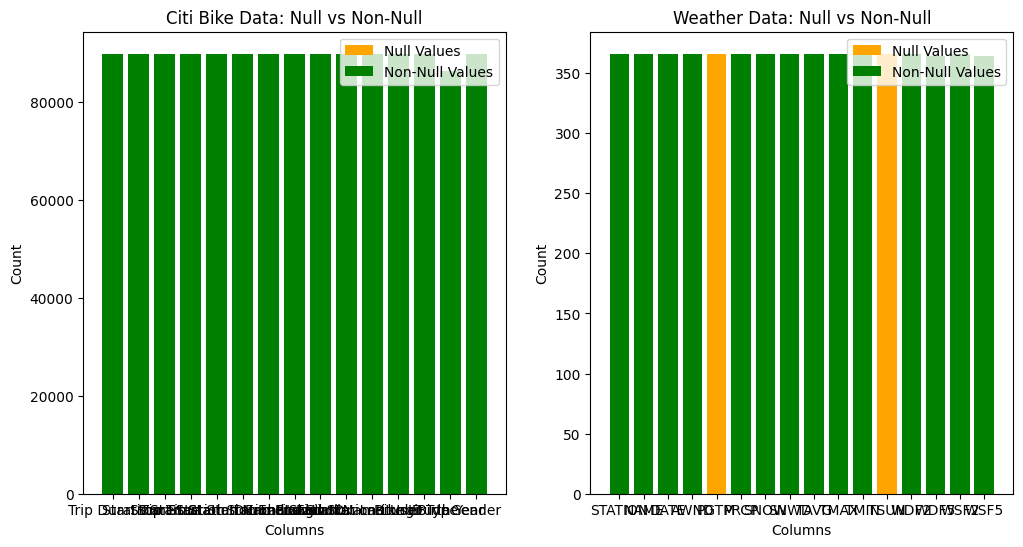

In [39]:
import matplotlib.pyplot as plt

# Plot for Citi Bike Data
citi_bike_nulls = citi_bike_data.isna().sum()
citi_bike_non_nulls = citi_bike_data.notna().sum()

# Plot for Weather Data
weather_nulls = weather_data.isna().sum()
weather_non_nulls = weather_data.notna().sum()

# Create a figure and axis for plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Citi Bike Data bar plot
axes[0].bar(citi_bike_nulls.index, citi_bike_nulls, color='orange', label='Null Values')
axes[0].bar(citi_bike_non_nulls.index, citi_bike_non_nulls, color='green', label='Non-Null Values')
axes[0].set_title('Citi Bike Data: Null vs Non-Null')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Count')
axes[0].legend()

# Weather Data bar plot
axes[1].bar(weather_nulls.index, weather_nulls, color='orange', label='Null Values')
axes[1].bar(weather_non_nulls.index, weather_non_nulls, color='green', label='Non-Null Values')
axes[1].set_title('Weather Data: Null vs Non-Null')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Count')
axes[1].legend()

#plt.tight_layout()
plt.show()


Addressing The Missing Data - Weather Data

    Removing Missing Data: If rows or columns have too many missing values (e.g., more than 50% of values), it might make sense to drop them.

In [51]:
weather_data.columns = weather_data.columns.str.strip()  # Remove extra spaces in columns..or column name


weather_data.dropna(thresh=int(0.5 * len(weather_data)), axis=1, inplace=True)  # Drop columns with >50% missing
weather_data.dropna(subset=['PGTM'], inplace=True)  # Drop rows with missing values in specific column
weather_data.dropna(subset=['TSUN'], inplace=True)  

KeyError: ['PGTM']

In [52]:
print(weather_data.columns) # checking columns after
#The reason I got the eeerror was because the first line alreday droped the columns that have a 50+% of mmissing data

Index(['STATION', 'NAME', 'DATE', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5'],
      dtype='object')


    Filling Missing Data: You might choose to fill missing values with the mean, median, mode, or use forward/backward filling, depending on the data type and context.



In [54]:
weather_data['WDF5'] = weather_data['WDF5'].fillna(weather_data['WDF5'].mean())
weather_data['WSF5'] = weather_data['WSF5'].fillna(weather_data['WSF5'].mean())


In [56]:
print("Weather Data - Missing Values")
print(weather_data.isna().sum())  # Missing values

# We see that columns: WSF5 is missing 2 values, WDF5 is missing 2 values, TSUN is missing 366 values, and PGTM is missing 366 values

Weather Data - Missing Values
STATION    0
NAME       0
DATE       0
AWND       0
PRCP       0
SNOW       0
SNWD       0
TAVG       0
TMAX       0
TMIN       0
WDF2       0
WDF5       0
WSF2       0
WSF5       0
dtype: int64


In [58]:
print(weather_data.dtypes)


STATION     object
NAME        object
DATE        object
AWND       float64
PRCP       float64
SNOW       float64
SNWD       float64
TAVG         int64
TMAX         int64
TMIN         int64
WDF2         int64
WDF5       float64
WSF2       float64
WSF5       float64
dtype: object


Correcting the Data Types - Weather Data

In [61]:
#based off formating of weather table in Excel the WDF5 coumn should be covberted to int64

weather_data['WDF5'] = weather_data['WDF5'].astype('int64')
print(weather_data.dtypes)


STATION     object
NAME        object
DATE        object
AWND       float64
PRCP       float64
SNOW       float64
SNWD       float64
TAVG         int64
TMAX         int64
TMIN         int64
WDF2         int64
WDF5         int64
WSF2       float64
WSF5       float64
dtype: object


In [65]:
#DATE data type needs to be changed as well 

weather_data['DATE'] = pd.to_datetime(weather_data['DATE'])
    #pd.to_datetime(): This function is designed to convert date-like strings to datetime64. 
    #It will automatically infer the date format if it's a common one (like "MM/DD/YYYY").

print(weather_data['DATE'].dtype)

print(weather_data.dtypes)


datetime64[ns]
STATION            object
NAME               object
DATE       datetime64[ns]
AWND              float64
PRCP              float64
SNOW              float64
SNWD              float64
TAVG                int64
TMAX                int64
TMIN                int64
WDF2                int64
WDF5                int64
WSF2              float64
WSF5              float64
dtype: object


In [77]:
# Convert the 'NAME' column to the 'string' data type
weather_data['NAME'] = weather_data['NAME'].astype('string')

# Verify the conversion
print("NAME column's data type is:",weather_data['NAME'].dtype)  # Should print: string

# Convert the 'STATION' column to the 'string' data type
weather_data['STATION'] = weather_data['STATION'].astype('string')

print(weather_data.dtypes)



NAME column's data type is: string
STATION    string[python]
NAME       string[python]
DATE       datetime64[ns]
AWND              float64
PRCP              float64
SNOW              float64
SNWD              float64
TAVG                int64
TMAX                int64
TMIN                int64
WDF2                int64
WDF5                int64
WSF2              float64
WSF5              float64
dtype: object


Addressing The Missing Data - Citi Bike Data

In [66]:
citi_bike_data.info()   #pandas function shows the data types of each column and how many non-null values are present.

#Need to fill with mean the 3624 missing values from the Birth Year Column and ensure all data types are correct


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89748 entries, 0 to 89747
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Trip Duration            89748 non-null  int64  
 1   Start Time               89748 non-null  object 
 2   Stop Time                89748 non-null  object 
 3   Start Station ID         89748 non-null  int64  
 4   Start Station Name       89748 non-null  object 
 5   Start Station Latitude   89748 non-null  float64
 6   Start Station Longitude  89748 non-null  float64
 7   End Station ID           89748 non-null  int64  
 8   End Station Name         89748 non-null  object 
 9   End Station Latitude     89748 non-null  float64
 10  End Station Longitude    89748 non-null  float64
 11  Bike ID                  89748 non-null  int64  
 12  User Type                89748 non-null  object 
 13  Birth Year               86124 non-null  float64
 14  Gender                

In [67]:
# Calculate the mean of the 'Birth Year' column (ignoring missing values)
mean_birth_year = citi_bike_data['Birth Year'].mean()

# Fill missing values in the 'Birth Year' column with the mean and assign it back to the column
citi_bike_data['Birth Year'] = citi_bike_data['Birth Year'].fillna(mean_birth_year)

# Verify that the missing values have been filled
print(citi_bike_data['Birth Year'].isna().sum())  # Should print 0 if no missing values remain


0


In [68]:
citi_bike_data.info()   #pandas function shows the data types of each column and how many non-null values are present.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89748 entries, 0 to 89747
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Trip Duration            89748 non-null  int64  
 1   Start Time               89748 non-null  object 
 2   Stop Time                89748 non-null  object 
 3   Start Station ID         89748 non-null  int64  
 4   Start Station Name       89748 non-null  object 
 5   Start Station Latitude   89748 non-null  float64
 6   Start Station Longitude  89748 non-null  float64
 7   End Station ID           89748 non-null  int64  
 8   End Station Name         89748 non-null  object 
 9   End Station Latitude     89748 non-null  float64
 10  End Station Longitude    89748 non-null  float64
 11  Bike ID                  89748 non-null  int64  
 12  User Type                89748 non-null  object 
 13  Birth Year               89748 non-null  float64
 14  Gender                

In [72]:
#Handling Non-Standard Date Formats:
#If your date format isn't automatically detected (for example, if it uses a different separator or date format), 
#you can specify the format explicitly using the format parameter. For example:

#    %m stands for the month,
#    %d for the day,
#    %Y for the 4-digit year.

In [73]:
# Convert 'Start Time' and 'Stop Time' columns to datetime type with proper format
citi_bike_data['Start Time'] = pd.to_datetime(citi_bike_data['Start Time'], format='%m/%d/%Y %H:%M')
citi_bike_data['Stop Time'] = pd.to_datetime(citi_bike_data['Stop Time'], format='%m/%d/%Y %H:%M')

# Verify the conversion
print(citi_bike_data['Start Time'].dtype)  # Should print: datetime64[ns]
print(citi_bike_data['Stop Time'].dtype)  # Should print: datetime64[ns]


ValueError: time data "2016-01-01 00:02:52" doesn't match format "%m/%d/%Y %H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [74]:
# Try converting to ISO 8601 format (which is commonly used)
citi_bike_data['Start Time'] = pd.to_datetime(citi_bike_data['Start Time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
citi_bike_data['Stop Time'] = pd.to_datetime(citi_bike_data['Stop Time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

# If there are still NaT values, try using a different format for US-style date formats
#citi_bike_data['Start Time'] = pd.to_datetime(citi_bike_data['Start Time'], errors='coerce', format='%m/%d/%Y %H:%M')
#citi_bike_data['Stop Time'] = pd.to_datetime(citi_bike_data['Stop Time'], errors='coerce', format='%m/%d/%Y %H:%M')

# Verify that both formats are handled
print(citi_bike_data['Start Time'].dtype)  # Should print: datetime64[ns]
print(citi_bike_data['Stop Time'].dtype)  # Should print: datetime64[ns]


datetime64[ns]
datetime64[ns]


In [75]:
citi_bike_data.info()   #pandas function shows the data types of each column and how many non-null values are present.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89748 entries, 0 to 89747
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Trip Duration            89748 non-null  int64         
 1   Start Time               89748 non-null  datetime64[ns]
 2   Stop Time                89748 non-null  datetime64[ns]
 3   Start Station ID         89748 non-null  int64         
 4   Start Station Name       89748 non-null  object        
 5   Start Station Latitude   89748 non-null  float64       
 6   Start Station Longitude  89748 non-null  float64       
 7   End Station ID           89748 non-null  int64         
 8   End Station Name         89748 non-null  object        
 9   End Station Latitude     89748 non-null  float64       
 10  End Station Longitude    89748 non-null  float64       
 11  Bike ID                  89748 non-null  int64         
 12  User Type                89748 n

In [80]:
#need to clean the citi_bike_data, there should be no object data types change data types for Start Station ID, End Station ID, User Type

citi_bike_data.columns = citi_bike_data.columns.str.strip()  # Removes leading/trailing spaces

# Convert the 'STATION' column to the 'string' data type
citi_bike_data['Start Station ID'] = citi_bike_data['Start Station ID'].astype('string')
citi_bike_data['End Station ID'] = citi_bike_data['End Station ID'].astype('string')
citi_bike_data['User Type'] = citi_bike_data['User Type'].astype('string')

citi_bike_data.info()   #pandas function shows the data types of each column and how many non-null values are present.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89748 entries, 0 to 89747
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Trip Duration            89748 non-null  int64         
 1   Start Time               89748 non-null  datetime64[ns]
 2   Stop Time                89748 non-null  datetime64[ns]
 3   Start Station ID         89748 non-null  string        
 4   Start Station Name       89748 non-null  object        
 5   Start Station Latitude   89748 non-null  float64       
 6   Start Station Longitude  89748 non-null  float64       
 7   End Station ID           89748 non-null  string        
 8   End Station Name         89748 non-null  object        
 9   End Station Latitude     89748 non-null  float64       
 10  End Station Longitude    89748 non-null  float64       
 11  Bike ID                  89748 non-null  int64         
 12  User Type                89748 n

In [82]:
# Revert 'Start Station ID' to int64
citi_bike_data['Start Station ID'] = citi_bike_data['Start Station ID'].astype('int64')

In [83]:
citi_bike_data['Start Station Name'] = citi_bike_data['Start Station Name'].astype('string')
citi_bike_data['End Station Name'] = citi_bike_data['End Station Name'].astype('string')

In [84]:
citi_bike_data.info()   #pandas function shows the data types of each column and how many non-null values are present.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89748 entries, 0 to 89747
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Trip Duration            89748 non-null  int64         
 1   Start Time               89748 non-null  datetime64[ns]
 2   Stop Time                89748 non-null  datetime64[ns]
 3   Start Station ID         89748 non-null  int64         
 4   Start Station Name       89748 non-null  string        
 5   Start Station Latitude   89748 non-null  float64       
 6   Start Station Longitude  89748 non-null  float64       
 7   End Station ID           89748 non-null  string        
 8   End Station Name         89748 non-null  string        
 9   End Station Latitude     89748 non-null  float64       
 10  End Station Longitude    89748 non-null  float64       
 11  Bike ID                  89748 non-null  int64         
 12  User Type                89748 n

Fix Suspicious Data
    - After identifying missing values, you should check for data that seems out of place or incorrect (e.g., negative bike rentals, extreme weather values).                                                                                        
                                                                                                      


In [91]:
#Duplicated Data: Remove duplicates if any

citi_bike_data.drop_duplicates(inplace=True)
weather_data.drop_duplicates(inplace=True)



Create New Columns (Feature Engineering)

    Think about what the analysts might want to explore. Here are a few ideas for additional columns you could create:

    (Date-related Columns: Extract year, month, day of the week, or hour from the timestamp.)

In [92]:
citi_bike_data['year'] = citi_bike_data['start_time'].dt.year
citi_bike_data['month'] = citi_bike_data['start_time'].dt.month
citi_bike_data['day_of_week'] = citi_bike_data['start_time'].dt.weekday
citi_bike_data['hour'] = citi_bike_data['start_time'].dt.hour



KeyError: 'start_time'

In [93]:
#Weather Flags: Create columns indicating whether certain weather conditions are met (e.g., "rainy_day", "snowy_day").

weather_data['rainy_day'] = weather_data['PRCP'] > 0
weather_data['snowy_day'] = weather_data['SNOW'] > 0


In [94]:
#Join Indicator: Create a column to indicate whether a ride took place during a particularly hot or cold weather period (useful for analysis).

citi_bike_data['high_temp_day'] = citi_bike_data['Start Time'].dt.date.isin(
    weather_data[weather_data['TMAX'] > 85]['DATE'] #TMAX is max teperature
)


Save the Cleaned Data

     After cleaning and transforming the data, save it to CSV or directly into the PostgreSQL database.

In [96]:
citi_bike_data.to_csv('cleaned_citi_bike_data.csv', index=False)
weather_data.to_csv('cleaned_weather_data.csv', index=False)


Conclusion;
    This preparation was crucial for ensuring that your analysis is accurate and reliable. Now that the data has been inspected, cleaned, and transformed both datasets,I can move on to the next steps: merging the datasets and implementing the database.
